## 20NEWSGROUP + INPUT LIST

In [1]:
# Test 20newsgroups
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.datasets import fetch_20newsgroups
categories = ['sci.med', 'comp.os.ms-windows.misc']
data = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
documents = data.data
labels = data.target

# documents[:3]

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"                  # mainkan nilai ini
import torch
print("CUDA available:", torch.cuda.is_available())
print("Jumlah GPU terlihat:", torch.cuda.device_count())
print("Nama GPU:", torch.cuda.get_device_name())

CUDA available: True
Jumlah GPU terlihat: 1
Nama GPU: Quadro RTX 5000


In [3]:
from pipeline3 import DocumentClusteringPipeline

topic_model = DocumentClusteringPipeline(
    embedding_device="cuda"
)

topic_model.fit(
    documents=documents,
    umap_params={
        "n_neighbors": [10, 30],
        "n_components": [5, 10],
        "min_dist": [0.0],
        "metric": ["cosine"]
    },
    hdbscan_params={
        "min_cluster_size": [5, 10],
        "metric": ["euclidean"],
        "cluster_selection_method": ["eom"]
    },
    verbose=True
)

DOCUMENT CLUSTERING PIPELINE
Documents: 1975

[1/3] Generating SBERT embeddings...


Batches: 100%|██████████| 62/62 [00:03<00:00, 15.55it/s]


✔ Embeddings shape: (1975, 384)

[2/3] GridSearch UMAP + HDBSCAN
Run 1/8 | UMAP={'n_neighbors': 10, 'n_components': 5, 'min_dist': 0.0, 'metric': 'cosine'} | HDBSCAN={'min_cluster_size': 5, 'metric': 'euclidean', 'cluster_selection_method': 'eom'}
Run 2/8 | UMAP={'n_neighbors': 10, 'n_components': 5, 'min_dist': 0.0, 'metric': 'cosine'} | HDBSCAN={'min_cluster_size': 10, 'metric': 'euclidean', 'cluster_selection_method': 'eom'}
Run 3/8 | UMAP={'n_neighbors': 10, 'n_components': 10, 'min_dist': 0.0, 'metric': 'cosine'} | HDBSCAN={'min_cluster_size': 5, 'metric': 'euclidean', 'cluster_selection_method': 'eom'}
Run 4/8 | UMAP={'n_neighbors': 10, 'n_components': 10, 'min_dist': 0.0, 'metric': 'cosine'} | HDBSCAN={'min_cluster_size': 10, 'metric': 'euclidean', 'cluster_selection_method': 'eom'}
Run 5/8 | UMAP={'n_neighbors': 30, 'n_components': 5, 'min_dist': 0.0, 'metric': 'cosine'} | HDBSCAN={'min_cluster_size': 5, 'metric': 'euclidean', 'cluster_selection_method': 'eom'}
Run 6/8 | UMAP={

######################################

######################################

## DATASET ABSTRAK + INPUT DF

In [4]:
import pandas as pd
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

dataRaw = '../../datasets/CSARXIV.parquet.gzip'
df = pd.read_parquet( dataRaw , engine = 'fastparquet')
df = df.sample(n=100, random_state=42)

In [5]:
from pipeline3 import DocumentClusteringPipeline

topic_model2 = DocumentClusteringPipeline(embedding_device="cuda")

topic_model2.fit(
    documents=df,
    text_column="Abstract",
    title_column="Title",
    id_column="Arxiv_ID",
    verbose=True
)

DOCUMENT CLUSTERING PIPELINE
Documents: 100
⚠ UMAP params not provided → using default
⚠ HDBSCAN params not provided → using default

[1/3] Generating SBERT embeddings...


Batches: 100%|██████████| 4/4 [00:00<00:00, 17.51it/s]


✔ Embeddings shape: (100, 384)

[2/3] GridSearch UMAP + HDBSCAN
Run 1/1 | UMAP={'n_neighbors': 15, 'n_components': 5, 'min_dist': 0.0, 'metric': 'cosine'} | HDBSCAN={'min_cluster_size': 10, 'metric': 'euclidean', 'cluster_selection_method': 'eom'}

BEST RESULT
UMAP params     : {'n_neighbors': 15, 'n_components': 5, 'min_dist': 0.0, 'metric': 'cosine'}
HDBSCAN params  : {'min_cluster_size': 10, 'metric': 'euclidean', 'cluster_selection_method': 'eom'}
Clusters        : 3
Noise ratio     : 0.17
Silhouette      : 0.4264
DBCV            : 0.2356


In [6]:
print(topic_model2.inspect_clusters(
        n_samples=2, 
        n_clusters=5, 
        include_noise=True, 
        show_abstract=True,)
     )

=== Cluster -1 (17 documents) ===
1. [http://arxiv.org/abs/1212.2150v1] Collaborative Competitive filtering II: Optimal Recommendation and   Collaborative Games
    Recommender systems have emerged as a new weapon to help online firms to realize many of their strat...

2. [http://arxiv.org/abs/1509.01898v2] A Possible Implementation of a Direct Coupling Coherent Quantum Observer
    This paper considers the problem of implementing a previously proposed direct coupling quantum obser...

=== Cluster 0 (39 documents) ===
1. [http://arxiv.org/abs/1705.05396v1] Learning Probabilistic Programs Using Backpropagation
    Probabilistic modeling enables combining domain knowledge with learning from data, thereby supportin...

2. [http://arxiv.org/abs/1403.7455v1] Hybrid Approach to English-Hindi Name Entity Transliteration
    Machine translation (MT) research in Indian languages is still in its infancy. Not much work has bee...

=== Cluster 1 (24 documents) ===
1. [http://arxiv.org/abs/1606.046

In [7]:
np.unique(topic_model2.labels, return_counts=True)
# pd.Series(topic_model2.labels).value_counts().sort_index()

(array([-1,  0,  1,  2]), array([17, 39, 24, 20]))

In [8]:
# topic_model2.to_dataframe()

In [9]:
# topic_model2.gridsearch_log.sort_values(
#     by="silhouette",
#     ascending=False
# ).head(10)

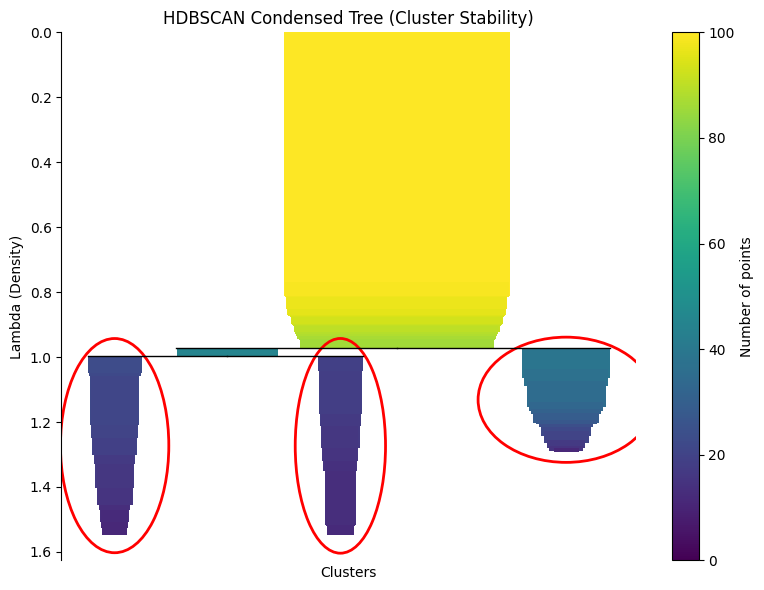

In [10]:
topic_model2.visualize_hdbscan_tree()

<Axes: >

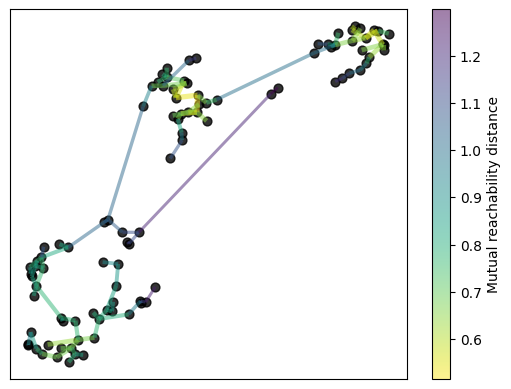

In [11]:
topic_model2._hdbscan_clusterer.minimum_spanning_tree_.plot()